In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
## read the train dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
## import the test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
## mearge the dataset
df = pd.concat([df_train, df_test], axis=1)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,P00128942,M,46-50,7.0,B,2,1.0,1.0,11.0,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,P00113442,M,26-35,17.0,C,0,0.0,3.0,5.0,NaN
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,P00288442,F,36-45,1.0,B,4+,1.0,5.0,14.0,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,P00145342,F,36-45,1.0,B,4+,1.0,4.0,9.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,...,P00053842,F,26-35,1.0,C,1,0.0,4.0,5.0,12.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  User_ID                     233599 non-null  float64
 13  Product_ID    

In [7]:
key_column = ['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

In [8]:
df = pd.merge(df_train, df_test, on=key_column, how='left')

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
df.drop('User_ID',axis=1,inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
##HAndling categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
## handle categoriacal feture age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
pd.get_dummies(df['Age'],drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
550063,False,False,False,False,True,False
550064,False,True,False,False,False,False
550065,False,True,False,False,False,False
550066,False,False,False,False,False,True


In [21]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [23]:
# handle the City_category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [25]:
df['City_Category']=df['City_Category'].map({'A':0,'B':1,'C':2})

In [26]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,2,4+,0,8,NaN,NaN,7969


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [28]:
# missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [29]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [34]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [35]:
df['Product_Category_2'].isnull().sum()

0

In [36]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [37]:
df['Product_Category_3'].isnull().sum()

0

In [38]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [40]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [42]:
## convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 44.1+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

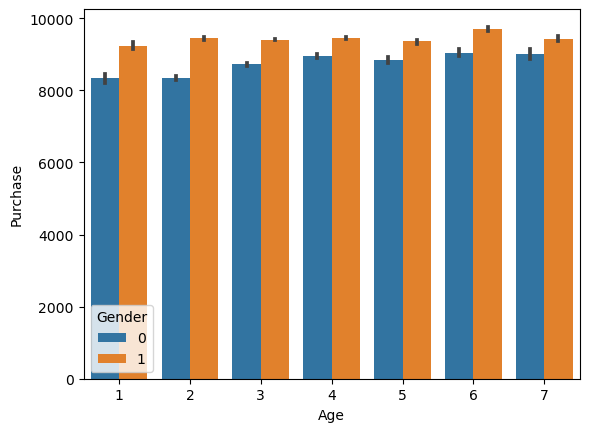

In [48]:
sns.barplot(data=df, x='Age', y='Purchase', hue='Gender')


# Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

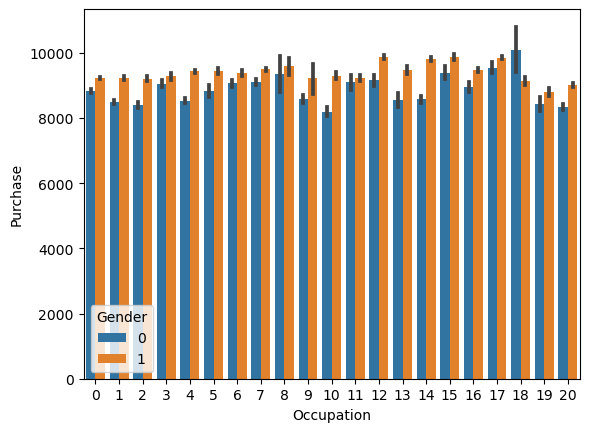

In [49]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

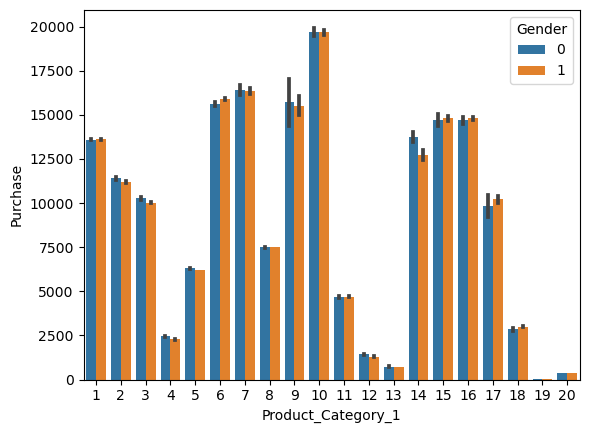

In [50]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

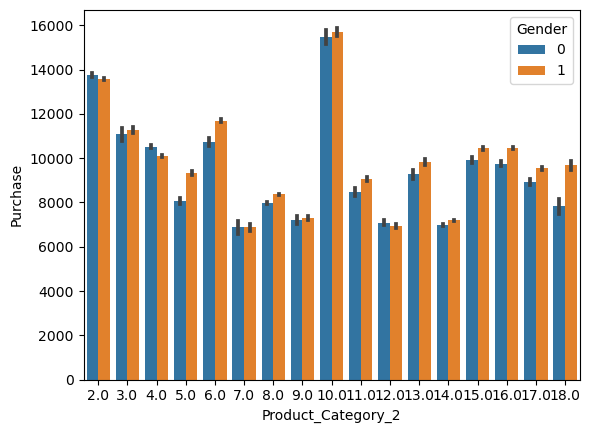

In [51]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

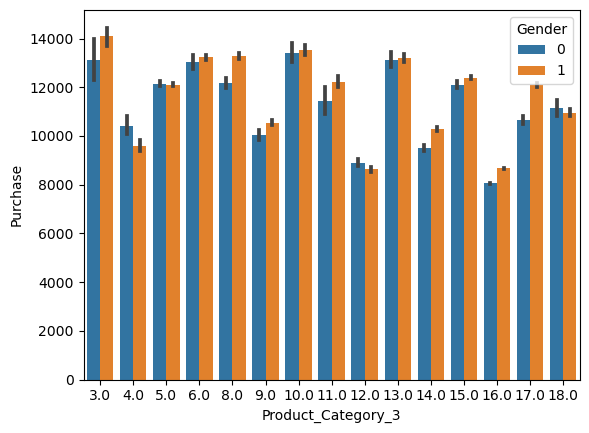

In [52]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)


In [53]:
df.drop('Product_ID',axis=1,inplace=True)

In [54]:
## independent and dependent feture
X=df.drop('Purchase',axis=1)
y=df['Purchase']

In [55]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,3,8.0,16.0
1,0,1,10,0,2,0,1,6.0,14.0
2,0,1,10,0,2,0,12,8.0,16.0
3,0,1,10,0,2,0,12,14.0,16.0
4,1,7,16,2,4,0,8,8.0,16.0


In [56]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [58]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
X_train

array([[ 0.57141282, -1.10505734,  0.90867822, ..., -1.11943802,
        -1.69098613,  0.36891877],
       [ 0.57141282,  1.84716932, -1.23820419, ...,  0.65927806,
         1.57019983,  0.36891877],
       [ 0.57141282,  0.37105599,  1.36872445, ..., -0.61123342,
        -1.22510242, -1.09182956],
       ...,
       [-1.75004823, -1.10505734, -1.08485545, ..., -0.10302883,
        -0.29333501,  0.36891877],
       [-1.75004823, -1.10505734, -0.62480922, ...,  0.65927806,
         1.10431612,  0.36891877],
       [-1.75004823, -1.10505734, -0.93150671, ..., -0.10302883,
         1.10431612,  0.36891877]])

In [ ]:
## TRAIN THE MODEL